In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("sensor_data_200.txt",delimiter = " ",header = None, names = ("data","time","ir","lidar"))

d =data.loc[:,["ir","lidar"]]#光センサとLiDARのデータだけにする

,ir,lidar
ir,109.394583,-13.444661
lidar,-13.444661,23.408107


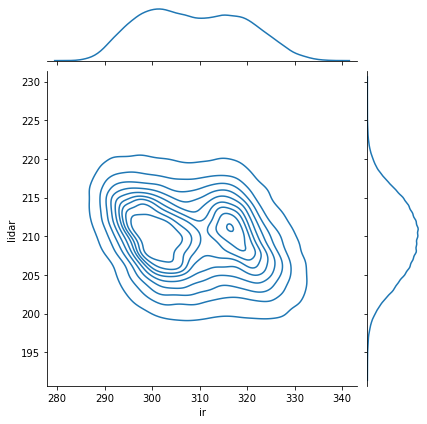

In [3]:
sns.jointplot(x = d.ir,y=d.lidar,data = d,kind="kde")
d.cov()

[308.68185055 209.73713298]
[[109.39458337 -13.44466112]
 [-13.44466112  23.4081066 ]]


<a list of 5 text.Text objects>

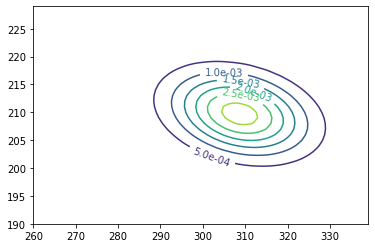

In [13]:
import numpy as np
from scipy.stats import multivariate_normal

x,y = np.mgrid[260:340,190:230]
pos = np.empty(x.shape+(2,))
pos[:,:,0] = x
pos[:,:,1] = y

#Tは転置らしい
print(d.mean().values.T)
print(d.cov().values)
irlidar = multivariate_normal(mean = d.mean().values.T,cov = d.cov().values) #２次元ガウス分布を作る
cont = plt.contour(x,y,irlidar.pdf(pos)) #密度の値の等高線を作る
cont.clabel(fmt = '%1.1e')

plt.show()
